# SALES PREDICTION

Our objective is to develop a precise regression model that can forecast future sales by analyzing the relationship between advertising expenditure and sales figures. To achieve this, we utilize a CSV file containing data on advertising spending and sales figures. The data is divided into training and testing sets, and the model's performance is evaluated based on its ability to accurately predict sales.

# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

# IMPORT DATASET

In [43]:
data=pd.read_csv("advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# REMOVE UNWANTED COLUMNS

In [44]:
data = data.drop(columns=['Unnamed: 0'])

# DATA ANALYSIS

In [45]:
data.shape

(200, 4)

In [46]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [48]:
import seaborn as sns

In [49]:
correlation = data.corr()

In [50]:
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

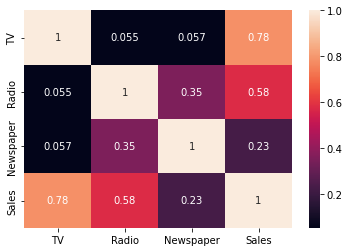

In [51]:
sns.heatmap(correlation,annot=True)

# SPLITING DATA INTO TWO DATASETS

In [52]:
x=data.iloc[:, 0:-1]

In [53]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [54]:
y=data.iloc[:,-1]

In [55]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

#  SPLITTING INTO TRAIN AND TEST DATA

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

# CONVERTING DATA INTO INTEGERS

In [57]:
xtrain=xtrain.astype(int)
ytrain=ytrain.astype(int)
xtest=xtest.astype(int)
ytest=ytest.astype(int)

In [58]:
xtrain,ytrain

(      TV  Radio  Newspaper
 137  273     28         59
 141  193     35         75
 66    31     24          2
 135   48     47          8
 6     57     32         23
 ..   ...    ...        ...
 1     44     39         45
 15   195     47         52
 184  253     21         30
 197  177      9          6
 98   289     42         51
 
 [140 rows x 3 columns],
 137    20
 141    19
 66      9
 135    11
 6      11
        ..
 1      10
 15     22
 184    17
 197    12
 98     25
 Name: Sales, Length: 140, dtype: int32)

In [59]:
xtest,ytest

(      TV  Radio  Newspaper
 192   17      4         31
 36   266     43          5
 21   237      5         23
 68   237     27         11
 168  215     23         57
 122  224      2         15
 63   102     29          8
 139  184     43          1
 46    89      9         35
 165  234      3         84
 144   96     14         38
 48   227     15         49
 157  149      1         24
 58   210     49         37
 143  104      5         34
 86    76     27         16
 84   213     43         33
 92   217     33         59
 29    70     16         40
 131  265      2         43
 28   248     27         22
 179  165     10         17
 189   18     12         23
 53   182     46         58
 34    95      1          7
 89   109     47         51
 93   250     36         72
 35   290      4          8
 30   292     28         43
 150  280     13         37
 10    66      5         24
 103  187     17         17
 134   36     38         65
 109  255     26          5
 156   93     43    

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [61]:
scaled_x_train=sc.fit_transform(xtrain)

In [62]:
scaled_x_test=sc.fit_transform(xtest)

# TRAINING LINEAR REGRESSION MODEL

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()

In [65]:
lr.fit(scaled_x_train,ytrain)

LinearRegression()

In [66]:
print("accuracy:",lr.score(scaled_x_test,ytest))

accuracy: 0.883714891274296
